<a href="https://colab.research.google.com/github/smaranjitghose/Big_Cat_Classifier/blob/master/notebooks/Big_Cat_Classifier_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q transformers

In [2]:
from PIL import Image
import requests
import os
import glob
import matplotlib.pyplot as plt
from transformers import ViTFeatureExtractor, ViTForImageClassification

In [3]:
from google.colab import files
for i in range (5):
    uploaded = files.upload()

Saving jaguar.jpg to jaguar.jpg


Saving leopard.jpg to leopard.jpg


Saving cheetah.jpg to cheetah.jpg


Saving lion.jpg to lion.jpg


Saving tiger.jpg to tiger.jpg


(-0.5, 975.5, 548.5, -0.5)

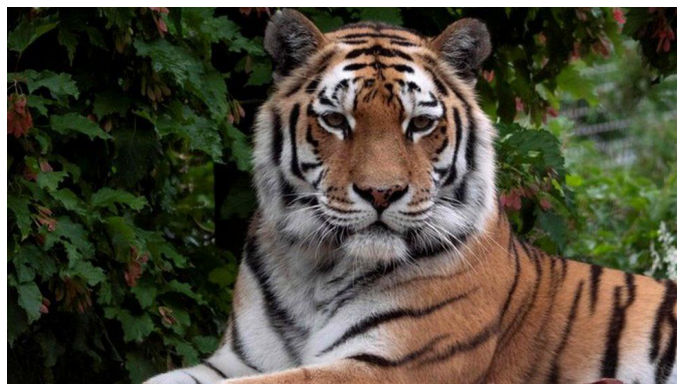

In [4]:
tiger_img = Image.open('/content/tiger.jpg')
plt.figure(figsize=(12,8))
plt.imshow(tiger_img)
plt.axis('off')

(-0.5, 639.5, 426.5, -0.5)

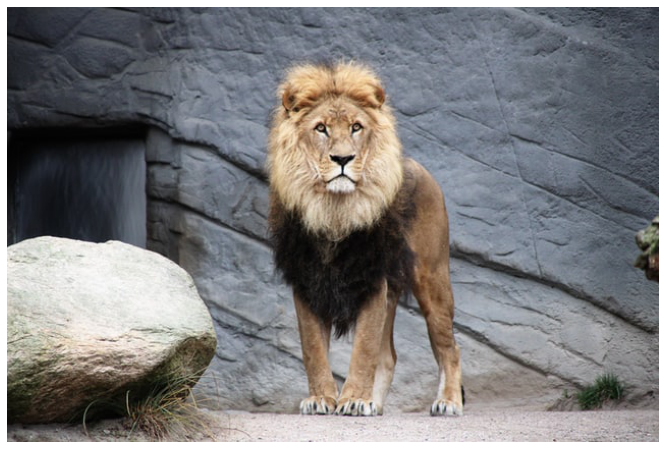

In [5]:
lion_img = Image.open('/content/lion.jpg')
plt.figure(figsize=(12,8))
plt.imshow(lion_img)
plt.axis('off')

(-0.5, 639.5, 639.5, -0.5)

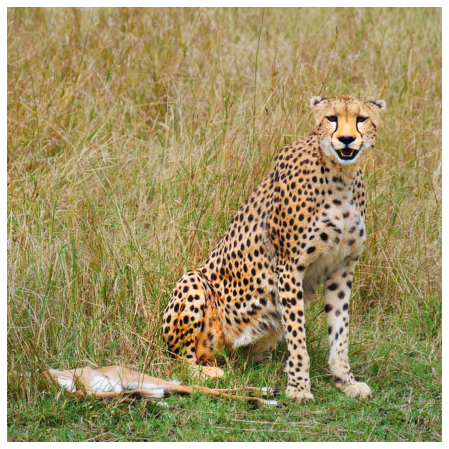

In [7]:
cheetah_img = Image.open('/content/cheetah.jpg')
plt.figure(figsize=(12,8))
plt.imshow(cheetah_img)
plt.axis('off')

(-0.5, 726.5, 500.5, -0.5)

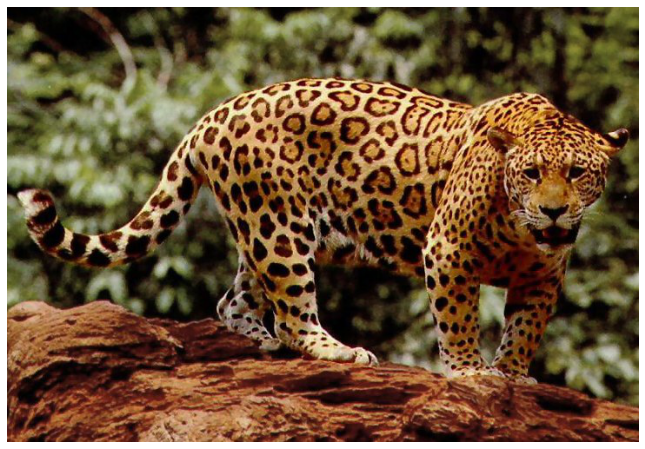

In [8]:
jaguar_img = Image.open('/content/jaguar.jpg')
plt.figure(figsize=(12,8))
plt.imshow(jaguar_img)
plt.axis('off')

(-0.5, 1199.5, 629.5, -0.5)

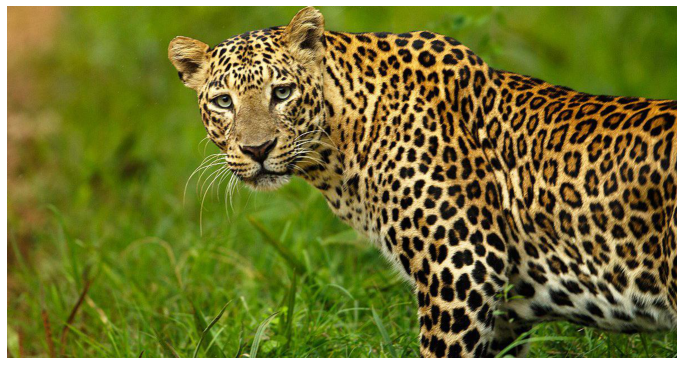

In [10]:
leopard_img = Image.open('/content/leopard.jpg')
plt.figure(figsize=(12,8))
plt.imshow(leopard_img)
plt.axis('off')

In [11]:
def identify_big_cat(img_path:str)->str:
  """
  Function that reads an image of a big cat (belonging to Panthera family) and returns the corresponding species
  """
  img = Image.open(img_path)
  model_panthera = ViTForImageClassification.from_pretrained("smaranjitghose/big-cat-classifier")
  feature_extractor = ViTFeatureExtractor.from_pretrained('smaranjitghose/big-cat-classifier')
  inputs = feature_extractor(images=img, return_tensors="pt")
  outputs = model_panthera(**inputs)
  logits = outputs.logits
  predicted_class_idx = logits.argmax(-1).item()
  return model_panthera.config.id2label[predicted_class_idx]

In [12]:
lion_pred = identify_big_cat("/content/lion.jpg")
print(f"Predicted species: {lion_pred} \n Actual Species: lion" )

Predicted species: lion 
 Actual Species: lion


In [13]:
tiger_pred = identify_big_cat("/content/tiger.jpg")
print(f"Predicted species: {tiger_pred} \n Actual Species: tiger" )

Predicted species: tiger 
 Actual Species: tiger


In [14]:
cheetah_pred = identify_big_cat("/content/cheetah.jpg")
print(f"Predicted species: {cheetah_pred} \n Actual Species: cheetah" )

Predicted species: cheetah 
 Actual Species: cheetah


In [15]:
jaguar_pred = identify_big_cat("/content/jaguar.jpg")
print(f"Predicted species: {jaguar_pred} \n Actual Species: jaguar" ) # At times, the model confuses between jaguars and leopards

Predicted species: leopard 
 Actual Species: jaguar


In [16]:
leopard_pred = identify_big_cat("/content/leopard.jpg")
print(f"Predicted species: {leopard_pred} \n Actual Species: leopard" )

Predicted species: leopard 
 Actual Species: leopard


## Edge Cases

In [17]:
def fetch_img_url(url:str, name:str = "img_x" ):
  """
  Funtion to fetch an image from the web, display it and return it
  """
  img = Image.open(requests.get(url, stream=True).raw)
  plt.figure(figsize=(12,8)) 
  plt.imshow(img)
  plt.axis('off')
  img_pth = f"./{name}.jpg"
  plt.savefig(img_pth, bbox_inches='tight',pad_inches = 0)
  return img_pth, img

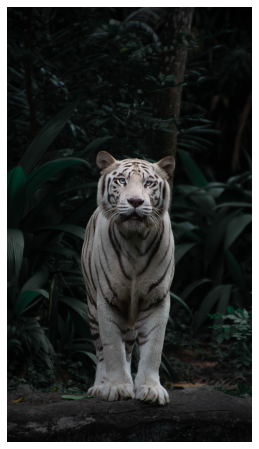

In [19]:
white_tiger_p, _ = fetch_img_url(url = 'https://images.unsplash.com/photo-1602491453631-e2a5ad90a131', name = "white_tiger")

In [20]:
our_big_cat = identify_big_cat(white_tiger_p)
print(f" Predicted species: {our_big_cat}\n Actual Species: White Tiger" )

 Predicted species: tiger
 Actual Species: White Tiger


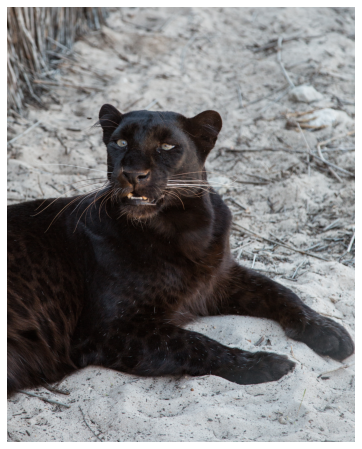

In [21]:
black_panther_p, _ = fetch_img_url(url = 'https://images.unsplash.com/photo-1557692538-9564c4b2cd13', name = "black_panther")

In [22]:
our_big_cat = identify_big_cat(black_panther_p)
print(f" Predicted species: {our_big_cat}\n Actual Species: Black Panther/Black Leopard/Black Jaguar " )

 Predicted species: leopard
 Actual Species: Black Panther/Black Leopard/Black Jaguar 


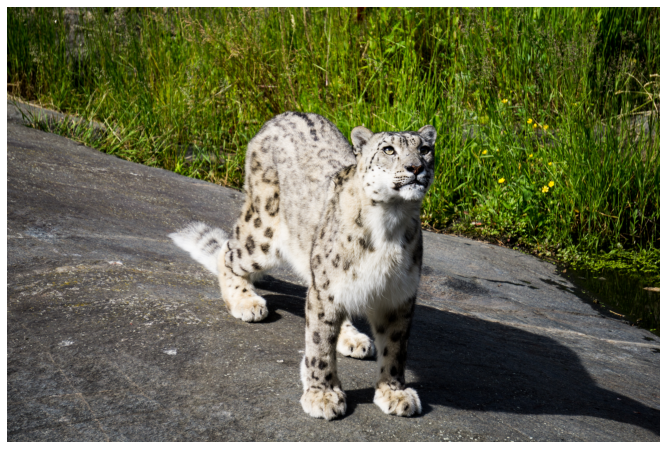

In [23]:
snow_leopard_p, _ = fetch_img_url(url = "https://images.unsplash.com/photo-1563898399566-550846d19fd8", name = "snow_leopard")

In [24]:
our_big_cat = identify_big_cat(snow_leopard_p)
print(f" Predicted species: {our_big_cat}\n Actual Species: Snow Leopard" )

 Predicted species: leopard
 Actual Species: Snow Leopard


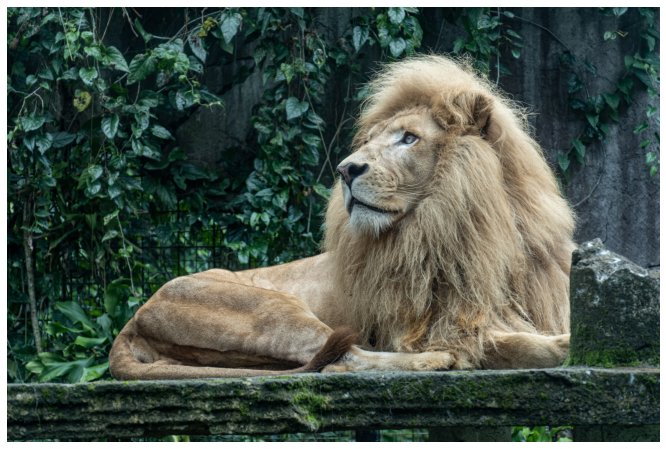

In [25]:
white_lion_p, _ = fetch_img_url(url = "https://images.unsplash.com/photo-1610944102855-5a216c1d722d", name = "white_lion")

In [26]:
our_big_cat = identify_big_cat(white_lion_p)
print(f" Predicted species: {our_big_cat}\n Actual Species: White Lion" )

 Predicted species: lion
 Actual Species: White Lion
